In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

11490434/11490434 [==============================] - 0s 0us/step


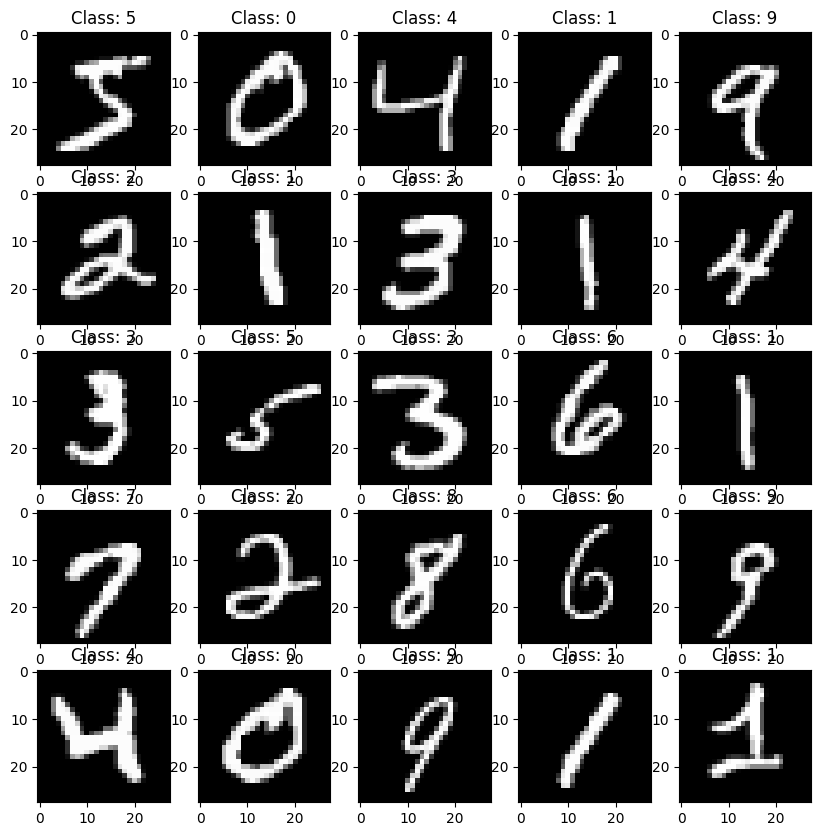

In [ ]:
# Download and load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title("Class: {}".format(y_train[i]))
plt.show()

In [ ]:
# Reshape data to 28x28x1 format
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize pixel values to range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Define model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])

# Compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

Epoch 1/10
1500/1500 [==============================] - 42s 27ms/step - loss: 0.1771 - accuracy: 0.9467 - val_loss: 0.0706 - val_accuracy: 0.9805
Epoch 2/10
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0557 - accuracy: 0.9827 - val_loss: 0.0577 - val_accuracy: 0.9821
Epoch 3/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0405 - accuracy: 0.9873 - val_loss: 0.0514 - val_accuracy: 0.9845
Epoch 4/10
1500/1500 [==============================] - 38s 26ms/step - loss: 0.0305 - accuracy: 0.9901 - val_loss: 0.0439 - val_accuracy: 0.9871
Epoch 5/10
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0251 - accuracy: 0.9925 - val_loss: 0.0388 - val_accuracy: 0.9887
Epoch 6/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0189 - accuracy: 0.9939 - val_loss: 0.0429 - val_accuracy: 0.9870
Epoch 7/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.0451 -

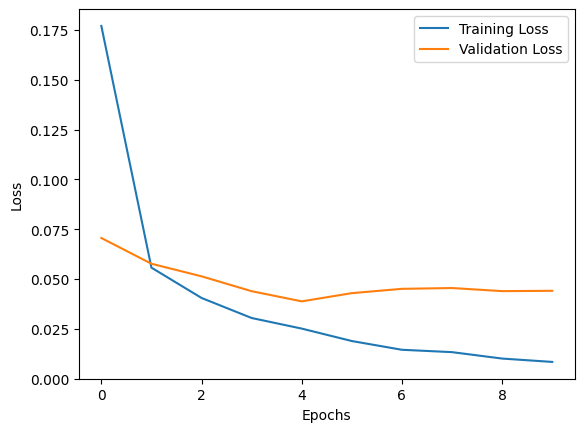

In [ ]:
# Train model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Plot epochs vs loss to find optimal epochs
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Evaluate model on test set
loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

313/313 [==============================] - 4s 13ms/step - loss: 0.0364 - accuracy: 0.9904
Test loss: 0.03635748103260994
Test accuracy: 0.9904000163078308
